In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Data preprocessing

In [2]:
import numpy as np
import pandas as pd
import math
from tqdm import tqdm

import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## 1) Load data

### (1) Punching

In [3]:
punching_path ='/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/punching_sliding.csv'

In [4]:
df_punching = pd.read_csv(punching_path)

df_punching.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,y
0,290.693,161.699,307.602,207.250,285.384,205.939,275.033,250.267,265.938,286.746,331.090,211.121,337.569,259.385,327.208,295.910,286.718,291.991,291.966,354.547,289.371,401.517,318.035,294.563,328.432,358.453,337.620,419.732,290.661,158.996,298.499,160.267,0.0,0.0,317.984,164.255,2
1,290.692,161.703,307.593,205.975,284.154,204.656,275.023,250.258,265.927,286.758,331.096,211.115,337.552,263.272,325.892,298.512,285.515,291.992,291.964,354.542,289.346,401.530,318.033,294.569,328.429,358.463,337.624,420.964,290.662,159.004,298.495,160.273,0.0,0.0,317.984,164.251,2
2,291.954,161.696,307.587,207.241,284.136,204.675,275.016,251.537,265.938,286.740,331.109,211.125,337.554,263.290,325.854,298.535,285.498,291.992,291.975,354.535,289.367,401.528,318.019,294.574,328.420,358.453,337.624,420.957,290.669,158.995,298.510,160.266,0.0,0.0,317.990,164.251,2
3,290.694,161.694,307.602,207.250,284.168,205.932,275.020,251.551,265.923,286.781,331.107,211.127,337.545,263.302,325.848,299.779,285.515,293.261,291.966,354.561,289.356,401.517,318.030,294.579,328.419,358.455,337.629,420.955,290.658,158.992,298.504,160.261,0.0,0.0,316.802,164.252,2
4,290.694,161.683,307.600,207.254,284.173,205.931,275.016,251.550,265.919,286.792,331.101,211.132,337.561,263.289,325.891,299.781,286.713,293.268,291.954,354.529,289.358,401.508,318.028,294.586,328.429,358.462,337.632,420.970,290.667,158.981,298.509,160.255,0.0,0.0,317.985,164.270,2


### (2) Smoking

In [5]:
smoking_path ='/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/smoking_sliding.csv'

In [6]:
df_smoking = pd.read_csv(smoking_path)

df_smoking.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,y
0,333.770000,85.241778,324.893667,117.939111,305.293000,119.228000,295.470667,162.394222,297.418667,201.668889,341.613333,116.635111,351.406667,154.591556,349.486667,132.359556,309.233000,204.285778,303.348000,267.131556,302.326000,323.346222,333.786667,204.287556,332.769000,267.078667,326.903333,320.686222,330.772000,78.676444,337.650000,78.681778,951.296,180.159,0.0,0.0,1
1,333.790000,85.257778,324.900667,117.922667,306.279667,119.208000,295.499333,162.396889,297.438667,202.923111,341.596667,116.629778,352.383333,153.326222,349.453333,129.706667,309.247667,204.291111,304.301000,267.088000,302.311000,323.341333,333.783333,204.279111,332.776000,267.048444,327.850000,319.456000,330.793667,78.677333,338.630000,78.707111,954.022,180.145,0.0,0.0,1
2,334.726667,86.532000,324.929333,117.944444,307.238000,119.218222,295.492333,162.445333,297.437000,203.006222,342.553333,116.648000,356.276667,153.281333,349.423333,127.101333,309.245000,204.280444,304.305333,267.110667,302.328333,323.337333,333.783333,204.265333,332.779667,267.073778,327.848000,319.466667,331.762333,78.708889,339.593333,78.735111,954.154,180.149,0.0,0.0,1
3,334.750000,86.560000,325.887000,116.626667,308.246000,117.935111,296.467333,161.117333,296.472000,201.634222,344.516667,115.312889,356.326667,153.299111,349.396667,125.814222,309.236667,203.004889,304.324333,267.065333,302.322000,322.046222,334.706667,203.014222,332.779000,267.043111,327.851000,320.692000,331.787000,78.740889,339.616667,78.747556,954.270,183.041,0.0,0.0,1
4,335.693333,86.576000,325.897333,116.635556,309.174667,117.969778,296.454333,161.153778,296.440000,201.635556,344.510000,114.017778,357.293333,153.281778,348.490000,121.908000,309.245667,202.997778,306.263000,265.787556,302.312667,322.045333,334.703333,203.001333,332.793667,265.820000,326.898667,320.699556,332.704000,78.756000,340.543333,78.752889,957.030,183.052,0.0,0.0,1


### (3) Walking

In [7]:
walking_path ='/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/walking_sliding.csv'

In [8]:
df_walking = pd.read_csv(walking_path)

df_walking.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,y
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,2.591563,268.375111,34.471000,318.115556,18.768733,412.252000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,2.119073,276.197333,38.427667,324.640444,40.388333,413.647111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.0,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.973267,261.836000,35.534667,331.182667,56.094333,409.643111,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.0,0
3,14.865767,48.626222,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0000,0.000000,0.0000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.950300,36.842400,0.000000,0.000000,7.81100,74.0119,0.0,0.0,0
4,25.678567,46.038667,2.602713,87.830667,2.610417,87.808889,0.0,0.0,0.0,0.0,10.9581,87.867111,18.7978,214.746667,57.039,244.859556,9.970833,251.376889,51.176333,325.939111,90.450667,410.959111,12.930667,246.168444,53.159000,325.941778,91.442333,407.053333,19.800967,36.828222,26.649067,38.136844,7.78672,82.8243,0.0,0.0,0


## 2) Check Null Value

In [9]:
df_punching.isnull().sum().sum()

0

In [10]:
df_smoking.isnull().sum().sum()

0

In [11]:
df_walking.isnull().sum().sum()

0

## 3) Concatenate Data

In [12]:
print(df_punching.shape)
print(df_smoking.shape)
print(df_walking.shape)
print(df_punching.shape[0] + df_smoking.shape[0] + df_walking.shape[0])

(190080, 37)
(142848, 37)
(2234848, 37)
2567776


In [13]:
df = pd.concat((df_punching, df_smoking, df_walking), axis=0, ignore_index=True)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,y
0,290.693,161.699,307.602,207.250,285.384,205.939,275.033,250.267,265.938,286.746,331.090,211.121,337.569,259.385,327.208,295.910,286.718,291.991,291.966,354.547,289.371,401.517,318.035,294.563,328.432,358.453,337.620,419.732,290.661,158.996,298.499,160.267,0.0,0.0,317.984,164.255,2
1,290.692,161.703,307.593,205.975,284.154,204.656,275.023,250.258,265.927,286.758,331.096,211.115,337.552,263.272,325.892,298.512,285.515,291.992,291.964,354.542,289.346,401.530,318.033,294.569,328.429,358.463,337.624,420.964,290.662,159.004,298.495,160.273,0.0,0.0,317.984,164.251,2
2,291.954,161.696,307.587,207.241,284.136,204.675,275.016,251.537,265.938,286.740,331.109,211.125,337.554,263.290,325.854,298.535,285.498,291.992,291.975,354.535,289.367,401.528,318.019,294.574,328.420,358.453,337.624,420.957,290.669,158.995,298.510,160.266,0.0,0.0,317.990,164.251,2
3,290.694,161.694,307.602,207.250,284.168,205.932,275.020,251.551,265.923,286.781,331.107,211.127,337.545,263.302,325.848,299.779,285.515,293.261,291.966,354.561,289.356,401.517,318.030,294.579,328.419,358.455,337.629,420.955,290.658,158.992,298.504,160.261,0.0,0.0,316.802,164.252,2
4,290.694,161.683,307.600,207.254,284.173,205.931,275.016,251.550,265.919,286.792,331.101,211.132,337.561,263.289,325.891,299.781,286.713,293.268,291.954,354.529,289.358,401.508,318.028,294.586,328.429,358.462,337.632,420.970,290.667,158.981,298.509,160.255,0.0,0.0,317.985,164.270,2


In [14]:
df.shape[0] / 32

80243.0

In [15]:
df['y'].value_counts()

0    2234848
2     190080
1     142848
Name: y, dtype: int64

## *) Joint(x, y) Preprocessing



#### Delete Nose, Eye, Ear

```
{0,  "Nose"}, -> '0', '1' delete
{1,  "Neck"}, -> '2', '3'
{2,  "RShoulder"}, -> '4', '5'
{3,  "RElbow"}, -> '6', '7'
{4,  "RWrist"}, -> '8', '9'
{5,  "LShoulder"}, -> '10', '11'
{6,  "LElbow"}, -> '12', '13'
{7,  "LWrist"}, -> '14', '15'
{8,  "RHip"}, -> '16', '17'
{9,  "RKnee"}, -> '18', '19'
{10, "RAnkle"}, -> '20', '21'
{11, "LHip"}, -> '22', '23'
{12, "LKnee"}, -> '24', '25'
{13, "LAnkle"}, -> '26', '27'
{14, "REye"}, -> '28', '29' delete
{15, "LEye"}, -> '30', '31' delete
{16, "REar"}, -> '32', '33' delete
{17, "LEar"}, -> '34', '35' delete
```

In [16]:
def deleteJoint(df):
    df.drop(['0', '1'] + [str(i) for i in range(28, 36)], axis=1, inplace=True)
    
    return df

In [17]:
df = deleteJoint(df)

df.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,y
0,307.602,207.250,285.384,205.939,275.033,250.267,265.938,286.746,331.090,211.121,337.569,259.385,327.208,295.910,286.718,291.991,291.966,354.547,289.371,401.517,318.035,294.563,328.432,358.453,337.620,419.732,2
1,307.593,205.975,284.154,204.656,275.023,250.258,265.927,286.758,331.096,211.115,337.552,263.272,325.892,298.512,285.515,291.992,291.964,354.542,289.346,401.530,318.033,294.569,328.429,358.463,337.624,420.964,2
2,307.587,207.241,284.136,204.675,275.016,251.537,265.938,286.740,331.109,211.125,337.554,263.290,325.854,298.535,285.498,291.992,291.975,354.535,289.367,401.528,318.019,294.574,328.420,358.453,337.624,420.957,2
3,307.602,207.250,284.168,205.932,275.020,251.551,265.923,286.781,331.107,211.127,337.545,263.302,325.848,299.779,285.515,293.261,291.966,354.561,289.356,401.517,318.030,294.579,328.419,358.455,337.629,420.955,2
4,307.600,207.254,284.173,205.931,275.016,251.550,265.919,286.792,331.101,211.132,337.561,263.289,325.891,299.781,286.713,293.268,291.954,354.529,289.358,401.508,318.028,294.586,328.429,358.462,337.632,420.970,2


### Extract Angle from Joint (x,y)

#### Extract Angle

Joints

```
{1,  "Neck"}, -> '2', '3'
{2,  "RShoulder"}, -> '4', '5'
{3,  "RElbow"}, -> '6', '7'
{4,  "RWrist"}, -> '8', '9'
{5,  "LShoulder"}, -> '10', '11'
{6,  "LElbow"}, -> '12', '13'
{7,  "LWrist"}, -> '14', '15'
{8,  "RHip"}, -> '16', '17'
{9,  "RKnee"}, -> '18', '19'
{10, "RAnkle"}, -> '20', '21'
{11, "LHip"}, -> '22', '23'
{12, "LKnee"}, -> '24', '25'
{13, "LAnkle"}, -> '26', '27'
```

Angle

```
Angle__RShoulder : Neck - RShoulder - RElbow
Angle_RElbow : RShoulder - RElbow - RWrist
Angle_RHip : Neck - RHip - RKnee
Angle_RKnee : RHip - RKnee - RAnkle

Angle__LShoulder : Neck - LShoulder - LElbow
Angle_LElbow : LShoulder - LElbow - LWrist
Angle_LHip : Neck - LHip - LKnee
Angle_LKnee : LHip - LKnee - LAnkle
```

In [18]:
def makeJointXY(df):
    df['Neck'] = [np.array(list(i)) for i in zip(df['2'], df['3'])]

    df['RShoulder'] = [np.array(list(i)) for i in zip(df['4'], df['5'])]
    df['RElbow'] = [np.array(list(i)) for i in zip(df['6'], df['7'])]
    df['RWrist'] = [np.array(list(i)) for i in zip(df['8'], df['9'])]
    df['RHip'] = [np.array(list(i)) for i in zip(df['16'], df['17'])]
    df['RKnee'] = [np.array(list(i)) for i in zip(df['18'], df['19'])]
    df['RAnkle'] = [np.array(list(i)) for i in zip(df['20'], df['21'])]

    df['LShoulder'] = [np.array(list(i)) for i in zip(df['10'], df['11'])]
    df['LElbow'] = [np.array(list(i)) for i in zip(df['12'], df['13'])]
    df['LWrist'] = [np.array(list(i)) for i in zip(df['14'], df['15'])]
    df['LHip'] = [np.array(list(i)) for i in zip(df['22'], df['23'])]
    df['LKnee'] = [np.array(list(i)) for i in zip(df['24'], df['25'])]
    df['LAnkle'] = [np.array(list(i)) for i in zip(df['26'], df['27'])]

    df.drop([str(i) for i in range(2, 28)], axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)

    return df

In [19]:
def extractAngle(a, joint, c):
    a = np.array(a)
    joint = np.array(joint)
    c = np.array(c)
    
    a_j = a - joint
    c_j = c - joint

    theta = []

    for i in tqdm(range(a.shape[0])):
        th_a_j = math.atan2(a_j[i][1], a_j[i][0])
        th_c_j = math.atan2(c_j[i][1], c_j[i][0])
        theta.append(th_a_j - th_c_j)

    return theta

In [20]:
def jointAngles(df):
    df['Ang_RShoulder'] = extractAngle(df['Neck'], df['RShoulder'], df['RElbow'])
    df['Ang_RElbow'] = extractAngle(df['RShoulder'], df['RElbow'], df['RWrist'])
    df['Ang_RHip'] = extractAngle(df['Neck'], df['RHip'], df['RKnee'])
    df['Ang_RKnee'] = extractAngle(df['RHip'], df['RKnee'], df['RAnkle'])

    df['Ang_LShoulder'] = extractAngle(df['Neck'], df['LShoulder'], df['LElbow'])
    df['Ang_LElbow'] = extractAngle(df['LShoulder'], df['LElbow'], df['LWrist'])
    df['Ang_LHip'] = extractAngle(df['Neck'], df['LHip'], df['LKnee'])
    df['Ang_LKnee'] = extractAngle(df['LHip'], df['LKnee'], df['LAnkle'])
    
    df.drop(df.columns[1:14], axis=1, inplace=True)
    df.reset_index(drop=True, inplace=True)

    return df

In [21]:
df = makeJointXY(df)
df = jointAngles(df)

100%|██████████| 2567776/2567776 [00:04<00:00, 557857.47it/s]


## 4) Make 'y'

In [22]:
def makeY(df, n_frame=32):
    y = df['y'].to_list()
    y = [y[i * n_frame:(i + 1) * n_frame] for i in range((len(y) + n_frame - 1) // n_frame )]
    y = [ys[0] for ys in y]

    encoder = LabelEncoder()    
    encoder.fit(y)
    classes = encoder.classes_
    y = encoder.transform(y)

    y = to_categorical(y)

    return y, classes

In [23]:
y, classes = makeY(df)

In [24]:
y.shape

(80243, 3)

In [25]:
classes

array([0, 1, 2])

In [26]:
y

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## 5) Make 'X'

In [27]:
def makeX(df, n_frame=32):
    x_cat = df.iloc[:,1:].values

    data = []
    for rows in tqdm(x_cat):
        for element in rows:
            data.append(np.float32(element))

    x = np.array(data)
    x = x.reshape(-1, 32, 8)

    return x

In [28]:
X = makeX(df)

100%|██████████| 2567776/2567776 [00:22<00:00, 112012.21it/s]


In [29]:
X.shape

(80243, 32, 8)

## 6) Data Split

In [30]:
random_seed = 0
n_frame = 32

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_seed, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=random_seed, stratify=y_train)

In [32]:
X_train.shape, y_train.shape

((57774, 32, 8), (57774, 3))

In [33]:
X_valid.shape, y_valid.shape

((14444, 32, 8), (14444, 3))

In [34]:
X_test.shape, y_test.shape

((8025, 32, 8), (8025, 3))

In [35]:
y_t = np.argmax(y_train,axis=1).reshape(-1,1)
y_t

unique, counts = np.unique(y_t, return_counts=True)
dict(zip(unique, counts))

{0: 50283, 1: 3214, 2: 4277}

In [36]:
y_v = np.argmax(y_valid,axis=1).reshape(-1,1)
y_v

unique, counts = np.unique(y_v, return_counts=True)
dict(zip(unique, counts))

{0: 12571, 1: 804, 2: 1069}

In [37]:
y_te = np.argmax(y_test,axis=1).reshape(-1,1)
y_te

unique, counts = np.unique(y_te, return_counts=True)
dict(zip(unique, counts))

{0: 6985, 1: 446, 2: 594}

# 2. LSTM Modeling

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

import keras.backend as K

In [39]:
n_input = 8 # angles
n_steps = 32 # per frames

n_hidden = 32
n_classes = len(y[0])

epochs = 100
batch_size = 128

## 1) Model define

In [40]:
K.clear_session()

model = Sequential()
model.add(Dense(n_hidden, activation='relu', input_shape=(n_steps, n_input)))
model.add(LSTM(n_hidden))
# model.add(LSTM(n_hidden))

model.add(Dense(n_classes, activation = 'softmax'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32, 32)            288       
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 8,707
Trainable params: 8,707
Non-trainable params: 0
_________________________________________________________________


## 2) Model Compile

In [53]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## 3) Model Fit

In [54]:
%%time
hist = model.fit(X_train, y_train,
                 epochs = epochs,
                 batch_size = batch_size,
                 validation_data = (X_valid, y_valid))

Epoch 1/100
452/452 [==============================] - 5s 7ms/step - loss: 0.4010 - accuracy: 0.8574 - val_loss: 0.1913 - val_accuracy: 0.9332
Epoch 2/100
452/452 [==============================] - 3s 6ms/step - loss: 0.1766 - accuracy: 0.9381 - val_loss: 0.1309 - val_accuracy: 0.9548
Epoch 3/100
452/452 [==============================] - 3s 6ms/step - loss: 0.1282 - accuracy: 0.9550 - val_loss: 0.1095 - val_accuracy: 0.9609
Epoch 4/100
452/452 [==============================] - 2s 6ms/step - loss: 0.1035 - accuracy: 0.9628 - val_loss: 0.0904 - val_accuracy: 0.9671
Epoch 5/100
452/452 [==============================] - 2s 6ms/step - loss: 0.0861 - accuracy: 0.9696 - val_loss: 0.0876 - val_accuracy: 0.9691
Epoch 6/100
452/452 [==============================] - 2s 5ms/step - loss: 0.0745 - accuracy: 0.9742 - val_loss: 0.0675 - val_accuracy: 0.9742
Epoch 7/100
452/452 [==============================] - 2s 5ms/step - loss: 0.0709 - accuracy: 0.9740 - val_loss: 0.0508 - val_accuracy: 0.9837

## 4) Visualization(Loss, Accuracy)

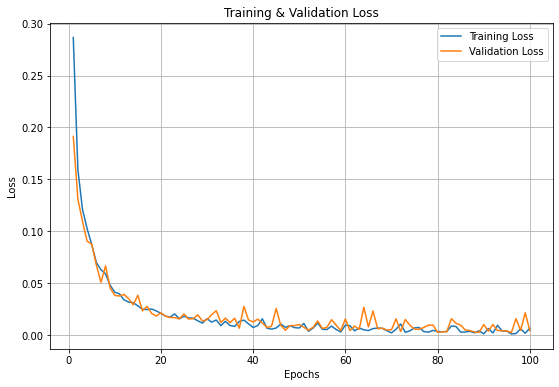

In [55]:
epochs = range(1, len(hist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist.history['loss'])
plt.plot(epochs, hist.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

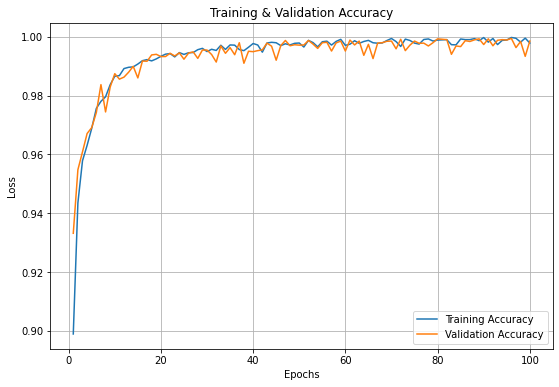

In [56]:
epochs = range(1, len(hist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist.history['accuracy'])
plt.plot(epochs, hist.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

## 5) Model Evaluate 

In [57]:
loss, accuracy = model.evaluate(X_test, y_test,
                                batch_size = batch_size)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

63/63 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9990
Loss = 0.00537
Accuracy = 0.99900


## 6) Model Save

In [58]:
abs_path = '/content/drive/MyDrive/Project/Project_Gotcha/models/'
model_name = 'lstm_p1_punching_smoking_walking_angle.h5'
final_path = abs_path + model_name

In [59]:
model.save(final_path)

# 3. Model Predict

## 1) Load Data

In [60]:
test_path = '/content/drive/MyDrive/Project/Project_Gotcha/ipynb/OpenPose/datasets/real_test.csv'

test_sample = pd.read_csv(test_path)
test_sample.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,index
0,131.090,158.404,104.906,183.220,110.116,183.185,162.316,193.695,204.122,201.516,97.0971,183.205,124.488,221.078,0.0,0.0,108.863,273.276,127.096,335.911,144.066,402.462,99.7320,270.668,110.185,329.394,97.0830,380.339,128.364,150.563,128.435,150.634,108.793,150.565,0.0,0.0,assault-punch_flip
1,131.075,153.246,104.930,183.228,110.141,183.186,162.346,198.904,206.708,202.745,97.1013,183.205,117.939,223.647,0.0,0.0,110.188,275.846,129.709,337.194,145.385,402.447,99.7283,273.283,110.202,329.406,97.0978,380.340,129.675,149.242,0.000,0.000,111.427,148.008,0.0,0.0,assault-punch_flip
2,131.052,153.234,107.520,183.257,115.369,183.250,163.639,205.435,205.419,202.846,97.0939,183.219,125.801,223.715,0.0,0.0,114.041,274.578,132.325,335.921,147.994,402.449,99.6768,271.959,111.434,329.372,98.3188,380.352,129.680,149.272,131.060,151.908,111.436,149.258,0.0,0.0,assault-punch_flip
3,137.531,153.186,110.139,183.290,120.575,184.531,158.432,222.338,198.883,213.235,99.6877,183.223,127.118,223.729,0.0,0.0,119.318,274.603,140.127,337.208,150.532,402.451,103.6160,271.968,114.061,328.141,97.1001,381.564,131.072,147.994,140.091,150.609,116.664,149.275,0.0,0.0,assault-punch_flip
4,140.158,153.219,111.470,183.291,121.878,184.541,149.284,224.998,192.374,223.621,101.0190,183.244,128.389,230.197,0.0,0.0,121.917,277.190,141.439,337.226,150.589,401.232,107.5290,275.861,117.926,329.426,98.3216,381.571,137.537,148.007,140.221,150.621,120.601,146.688,0.0,0.0,assault-punch_flip


In [61]:
test_sample = deleteJoint(test_sample)
test_sample = makeJointXY(test_sample)
test_sample = jointAngles(test_sample)

100%|██████████| 32/32 [00:00<00:00, 133152.51it/s]


In [62]:
test_sample.head()

,index,Ang_RShoulder,Ang_RElbow,Ang_RHip,Ang_RKnee,Ang_LShoulder,Ang_LElbow,Ang_LHip,Ang_LKnee
0,assault-punch_flip,2.936190,-3.127849,-2.902233,-3.175192,-0.942728,-0.113306,-2.906344,-3.569468
1,assault-punch_flip,2.841084,-2.935511,-2.890232,-3.213897,-1.092086,0.009511,-2.899397,-3.577908
2,assault-punch_flip,2.709890,-2.648894,-2.923201,-3.199961,-0.950486,-0.104408,-2.851410,-3.595384
3,assault-punch_flip,-3.807971,-2.135505,-2.920881,-3.304341,-0.969132,-0.078561,-2.884323,-3.632855
4,assault-punch_flip,-3.997458,-2.134255,-2.938008,-3.313986,-1.038531,-0.019006,-2.907328,-3.692921


In [63]:
X_pre = makeX(test_sample)

X_pre.shape

100%|██████████| 32/32 [00:00<00:00, 36314.32it/s]


(1, 32, 8)

## 2) Load Model

In [64]:
from keras.models import load_model

np.set_printoptions(precision=6, suppress=True) # np.array 표현 방식 변경 (지수 -> 실수)

In [65]:
loaded_model = load_model(final_path)

In [66]:
predict_dict = {}

predictions = loaded_model.predict(X_pre)

for idx, c in enumerate(classes):
    predict_dict[c] = predictions[0][idx]

print(predict_dict)

{0: 0.0022699088, 1: 1.2176978e-06, 2: 0.9977289}


In [67]:
predict_class = np.argmax(predictions[0], axis=-1)

classes[predict_class]

2